# Script Práctica 2 Parte 2 (Clasificación imágenes)

Redes de Neuronas Artificiales, curso 2022-2023

Universidad Carlos III de Madrid

# Importar TensorFlow, ciertos módulos de Keras y las librerías numpy y pandas.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para trabajar con un repositorio almacenado en drive

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
path = "/content/"
# Abrir el path concreto
#!ls
#%cd "/content/drive/MyDrive/RN/Practica1/parte1"
#!ls

Mounted at /content/drive/


# Descargar y observar el dataset

In [3]:
# Descarga del dataset
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()
# Nombre semántico de las clases
class_names={0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
             5: 'Sandal',  6: 'Shirt',   7: 'Sneaker',  8: 'Bag',   9: 'Ankle Boot'}

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#DIMENSION DE LOS DATOS
print("Dimensiones train_images")
print(train_images.shape)
print("Dimensiones test_images")
print(test_images.shape)
print("Dimensiones train_labels")
print(train_labels.shape)
print("Dimensiones test_labels")
print(test_labels.shape)

# OBTENER NUMERO DE CLASES
num_clases=len(np.unique(train_labels))
print("Número de clases")
print(num_clases)

#NUMERO DE PATRONES POR CLASE
print("Número patrones train")
print(pd.DataFrame(train_labels).value_counts())
print("Número patrones test")
print(pd.DataFrame(test_labels).value_counts())

Dimensiones train_images
(60000, 28, 28)
Dimensiones test_images
(10000, 28, 28)
Dimensiones train_labels
(60000,)
Dimensiones test_labels
(10000,)
Número de clases
10
Número patrones train
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64
Número patrones test
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64


Observando contenido patrones

In [5]:
# Observar datos de un patrón (pixeles)
print("Contenido patrón 3 train")
print(train_images[3])
print("Contenido patrón 3 test")
print(train_labels[3])

Contenido patrón 3 train
[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194
  102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179
  186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152
  148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140
  137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131
  131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119
  140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117
  127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119
  127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 1

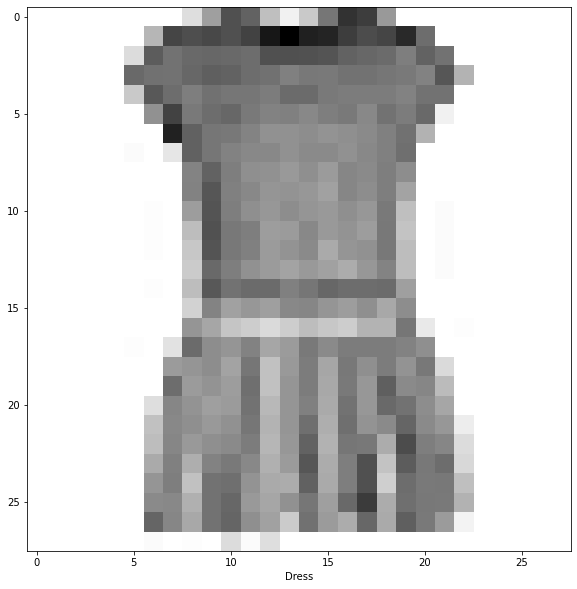

In [6]:
# Pintando el patrón 3 train
plt.figure(figsize=(10,10))
plt.imshow(train_images[3], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[3]])
plt.show()

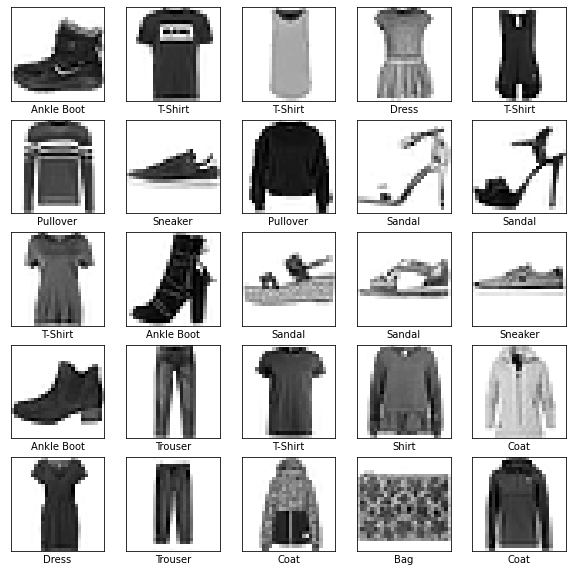

In [7]:
# VER ALGUNAS IMÁGENES. LAS 25 PRIMERAS DEL CONJUNTO DE ENTRENAMIENTO
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Definición modelo

In [8]:
# Definición de la semilla
from numpy.random import seed
from tensorflow.keras.utils import set_random_seed

semilla=1
seed(semilla)
set_random_seed(semilla)

In [9]:
# Guardar el checkpoint del mejor modelo
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel', monitor='val_loss',
                             mode='min',
                             verbose=1,
                             save_best_only=True)
callbacks_list = [checkpoint]

Definir un modelo con Perceptrón Multicapa MLP
- https://keras.io/api/layers/normalization_layers/batch_normalization/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/layers/reshaping_layers/flatten/
- https://keras.io/api/layers/core_layers/dense/

In [10]:
#DEFINICIÓN DE UN PM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Flatten

model_pm = Sequential()
model_pm.add(BatchNormalization(input_shape=(28,28)))
model_pm.add(Flatten(input_shape=(28,28)))
model_pm.add(Dense(150, activation='relu'))
model_pm.add(Dropout(0.5))
model_pm.add(Dense(150, activation='relu'))
model_pm.add(Dropout(0.5))
model_pm.add(Dense(num_clases, activation='softmax'))

model_pm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28)           112       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                        

CNN. Enlaces a la librería
- https://keras.io/api/layers/normalization_layers/batch_normalization/
- https://keras.io/api/layers/convolution_layers/convolution2d/
- https://keras.io/api/layers/pooling_layers/max_pooling2d/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/layers/reshaping_layers/flatten/
- https://keras.io/api/layers/core_layers/dense/

Ejemplo CNN Conv2D + ilustrando los feature map

1/1 [==============================] - 7s 7s/step


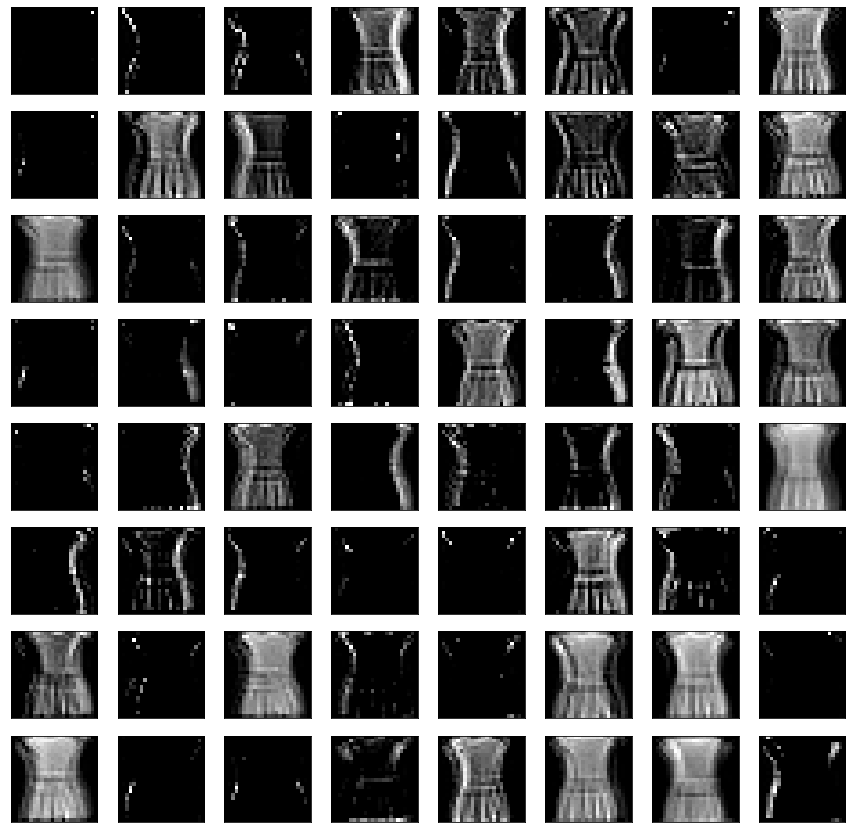

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
# Se define un modelo con una única capa de Conv2D. Aplica 64 filtros, con kernel tamaño 5x5
model_cnn = Sequential()
model_cnn.add(Conv2D(input_shape=(28,28,1), filters=64, kernel_size=(5, 5), activation='relu'))
# Se aplica el modelo sobre la imagen 3 de train
data = np.array([train_images[3]])
feature_map = model_cnn.predict(data)

# Se ilustran todos los feature maps obtenidos
plt.figure(figsize=(15,15))
for i in range(64):
  ax = plt.subplot(8,8,i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  feature_img = feature_map[0,:,:,i]
  plt.imshow(feature_img, cmap="gray")
plt.show()

In [12]:
#DEFINICIÓN DE UNA CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten

model_cnn= Sequential()
model_cnn.add(BatchNormalization(input_shape=(28,28,1)))



model_cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.5))

model_cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.5))




model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu')) # En la imagen pone 356, está mal.
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_clases, activation='softmax'))

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       2560      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 256)      0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 256)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)       

In [13]:
model_cnn.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

In [14]:
model_pm.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

# Entrenar y obtener resultados

In [15]:
historico_cnn = model_cnn.fit(train_images, train_labels, epochs=50, validation_freq=1, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/50
1497/1500 [============================>.] - ETA: 0s - loss: 0.5457 - sparse_categorical_accuracy: 0.8011
Epoch 1: val_loss improved from inf to 0.35841, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 19s 11ms/step - loss: 0.5455 - sparse_categorical_accuracy: 0.8011 - val_loss: 0.3584 - val_sparse_categorical_accuracy: 0.8728
Epoch 2/50
1494/1500 [============================>.] - ETA: 0s - loss: 0.3986 - sparse_categorical_accuracy: 0.8556
Epoch 2: val_loss improved from 0.35841 to 0.33077, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 13s 8ms/step - loss: 0.3983 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.3308 - val_sparse_categorical_accuracy: 0.8817
Epoch 3/50
1499/1500 [============================>.] - ETA: 0s - loss: 0.3601 - sparse_categorical_accuracy: 0.8665
Epoch 3: val_loss improved from 0.33077 to 0.29998, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 13s 9ms/step - loss: 0.3602 - sparse_categorical_accuracy: 0.8664 - val_loss: 0.3000 - val_sparse_categorical_accuracy: 0.8882
Epoch 4/50
1498/1500 [============================>.] - ETA: 0s - loss: 0.3379 - sparse_categorical_accuracy: 0.8767
Epoch 4: val_loss improved from 0.29998 to 0.29409, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 13s 9ms/step - loss: 0.3381 - sparse_categorical_accuracy: 0.8767 - val_loss: 0.2941 - val_sparse_categorical_accuracy: 0.8913
Epoch 5/50
1500/1500 [==============================] - ETA: 0s - loss: 0.3197 - sparse_categorical_accuracy: 0.8828
Epoch 5: val_loss improved from 0.29409 to 0.28218, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 13s 8ms/step - loss: 0.3197 - sparse_categorical_accuracy: 0.8828 - val_loss: 0.2822 - val_sparse_categorical_accuracy: 0.8973
Epoch 6/50
1495/1500 [============================>.] - ETA: 0s - loss: 0.3082 - sparse_categorical_accuracy: 0.8859
Epoch 6: val_loss improved from 0.28218 to 0.26807, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 13s 8ms/step - loss: 0.3083 - sparse_categorical_accuracy: 0.8857 - val_loss: 0.2681 - val_sparse_categorical_accuracy: 0.9020
Epoch 7/50
1500/1500 [==============================] - ETA: 0s - loss: 0.3031 - sparse_categorical_accuracy: 0.8890
Epoch 7: val_loss improved from 0.26807 to 0.26734, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 13s 9ms/step - loss: 0.3031 - sparse_categorical_accuracy: 0.8890 - val_loss: 0.2673 - val_sparse_categorical_accuracy: 0.9028
Epoch 8/50
1500/1500 [==============================] - ETA: 0s - loss: 0.2932 - sparse_categorical_accuracy: 0.8910
Epoch 8: val_loss improved from 0.26734 to 0.26028, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 13s 8ms/step - loss: 0.2932 - sparse_categorical_accuracy: 0.8910 - val_loss: 0.2603 - val_sparse_categorical_accuracy: 0.9042
Epoch 9/50
1496/1500 [============================>.] - ETA: 0s - loss: 0.2820 - sparse_categorical_accuracy: 0.8950
Epoch 9: val_loss improved from 0.26028 to 0.24177, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 13s 9ms/step - loss: 0.2818 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.2418 - val_sparse_categorical_accuracy: 0.9128
Epoch 10/50
1497/1500 [============================>.] - ETA: 0s - loss: 0.2749 - sparse_categorical_accuracy: 0.8965
Epoch 10: val_loss did not improve from 0.24177
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2750 - sparse_categorical_accuracy: 0.8965 - val_loss: 0.2543 - val_sparse_categorical_accuracy: 0.9052
Epoch 11/50
1494/1500 [============================>.] - ETA: 0s - loss: 0.2712 - sparse_categorical_accuracy: 0.8988
Epoch 11: val_loss did not improve from 0.24177
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2711 - sparse_categorical_accuracy: 0.8988 - val_loss: 0.2420 - val_sparse_categorical_accuracy: 0.9093
Epoch 12/50
1495/1500 [============================>.] - ETA: 0s - loss: 0.2648 - sparse_categorical_accuracy: 0.9019
Epoch 12: val_loss did not improve

1500/1500 [==============================] - 13s 8ms/step - loss: 0.2540 - sparse_categorical_accuracy: 0.9052 - val_loss: 0.2410 - val_sparse_categorical_accuracy: 0.9125
Epoch 16/50
1500/1500 [==============================] - ETA: 0s - loss: 0.2487 - sparse_categorical_accuracy: 0.9076
Epoch 16: val_loss improved from 0.24101 to 0.23371, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 13s 9ms/step - loss: 0.2487 - sparse_categorical_accuracy: 0.9076 - val_loss: 0.2337 - val_sparse_categorical_accuracy: 0.9161
Epoch 17/50
1495/1500 [============================>.] - ETA: 0s - loss: 0.2475 - sparse_categorical_accuracy: 0.9063
Epoch 17: val_loss did not improve from 0.23371
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2479 - sparse_categorical_accuracy: 0.9061 - val_loss: 0.2343 - val_sparse_categorical_accuracy: 0.9149
Epoch 18/50
1494/1500 [============================>.] - ETA: 0s - loss: 0.2409 - sparse_categorical_accuracy: 0.9085
Epoch 18: val_loss improved from 0.23371 to 0.23196, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 13s 9ms/step - loss: 0.2408 - sparse_categorical_accuracy: 0.9086 - val_loss: 0.2320 - val_sparse_categorical_accuracy: 0.9133
Epoch 19/50
1495/1500 [============================>.] - ETA: 0s - loss: 0.2393 - sparse_categorical_accuracy: 0.9095
Epoch 19: val_loss did not improve from 0.23196
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2391 - sparse_categorical_accuracy: 0.9096 - val_loss: 0.2392 - val_sparse_categorical_accuracy: 0.9128
Epoch 20/50
1500/1500 [==============================] - ETA: 0s - loss: 0.2407 - sparse_categorical_accuracy: 0.9095
Epoch 20: val_loss did not improve from 0.23196
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2407 - sparse_categorical_accuracy: 0.9095 - val_loss: 0.2353 - val_sparse_categorical_accuracy: 0.9168
Epoch 21/50
1498/1500 [============================>.] - ETA: 0s - loss: 0.2362 - sparse_categorical_accuracy: 0.9114
Epoch 21: val_loss did not improve

1500/1500 [==============================] - 13s 9ms/step - loss: 0.2323 - sparse_categorical_accuracy: 0.9134 - val_loss: 0.2242 - val_sparse_categorical_accuracy: 0.9202
Epoch 23/50
1500/1500 [==============================] - ETA: 0s - loss: 0.2309 - sparse_categorical_accuracy: 0.9134
Epoch 23: val_loss did not improve from 0.22421
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2309 - sparse_categorical_accuracy: 0.9134 - val_loss: 0.2301 - val_sparse_categorical_accuracy: 0.9169
Epoch 24/50
1498/1500 [============================>.] - ETA: 0s - loss: 0.2306 - sparse_categorical_accuracy: 0.9129
Epoch 24: val_loss did not improve from 0.22421
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2306 - sparse_categorical_accuracy: 0.9129 - val_loss: 0.2336 - val_sparse_categorical_accuracy: 0.9179
Epoch 25/50
1494/1500 [============================>.] - ETA: 0s - loss: 0.2295 - sparse_categorical_accuracy: 0.9128
Epoch 25: val_loss did not improve

1500/1500 [==============================] - 12s 8ms/step - loss: 0.2067 - sparse_categorical_accuracy: 0.9229 - val_loss: 0.2242 - val_sparse_categorical_accuracy: 0.9200
Epoch 38/50
1493/1500 [============================>.] - ETA: 0s - loss: 0.2071 - sparse_categorical_accuracy: 0.9236
Epoch 38: val_loss did not improve from 0.22421
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2071 - sparse_categorical_accuracy: 0.9236 - val_loss: 0.2265 - val_sparse_categorical_accuracy: 0.9211
Epoch 39/50
1500/1500 [==============================] - ETA: 0s - loss: 0.2076 - sparse_categorical_accuracy: 0.9227
Epoch 39: val_loss did not improve from 0.22421
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2076 - sparse_categorical_accuracy: 0.9227 - val_loss: 0.2253 - val_sparse_categorical_accuracy: 0.9197
Epoch 40/50
1493/1500 [============================>.] - ETA: 0s - loss: 0.2124 - sparse_categorical_accuracy: 0.9216
Epoch 40: val_loss did not improve

1500/1500 [==============================] - 13s 9ms/step - loss: 0.2085 - sparse_categorical_accuracy: 0.9217 - val_loss: 0.2222 - val_sparse_categorical_accuracy: 0.9184
Epoch 42/50
1497/1500 [============================>.] - ETA: 0s - loss: 0.2041 - sparse_categorical_accuracy: 0.9237
Epoch 42: val_loss did not improve from 0.22221
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2040 - sparse_categorical_accuracy: 0.9238 - val_loss: 0.2223 - val_sparse_categorical_accuracy: 0.9218
Epoch 43/50
1496/1500 [============================>.] - ETA: 0s - loss: 0.2035 - sparse_categorical_accuracy: 0.9245
Epoch 43: val_loss did not improve from 0.22221
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2035 - sparse_categorical_accuracy: 0.9244 - val_loss: 0.2354 - val_sparse_categorical_accuracy: 0.9193
Epoch 44/50
1497/1500 [============================>.] - ETA: 0s - loss: 0.2059 - sparse_categorical_accuracy: 0.9232
Epoch 44: val_loss improved from 0

1500/1500 [==============================] - 13s 9ms/step - loss: 0.2058 - sparse_categorical_accuracy: 0.9232 - val_loss: 0.2221 - val_sparse_categorical_accuracy: 0.9211
Epoch 45/50
1499/1500 [============================>.] - ETA: 0s - loss: 0.2033 - sparse_categorical_accuracy: 0.9239
Epoch 45: val_loss improved from 0.22210 to 0.22055, saving model to /content/drive/MyDrive/Colab Notebooks/PARTEII/bestmodel


1500/1500 [==============================] - 13s 8ms/step - loss: 0.2036 - sparse_categorical_accuracy: 0.9238 - val_loss: 0.2206 - val_sparse_categorical_accuracy: 0.9235
Epoch 46/50
1495/1500 [============================>.] - ETA: 0s - loss: 0.2022 - sparse_categorical_accuracy: 0.9242
Epoch 46: val_loss did not improve from 0.22055
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2023 - sparse_categorical_accuracy: 0.9241 - val_loss: 0.2481 - val_sparse_categorical_accuracy: 0.9115
Epoch 47/50
1500/1500 [==============================] - ETA: 0s - loss: 0.2037 - sparse_categorical_accuracy: 0.9252
Epoch 47: val_loss did not improve from 0.22055
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2037 - sparse_categorical_accuracy: 0.9252 - val_loss: 0.2213 - val_sparse_categorical_accuracy: 0.9214
Epoch 48/50
1499/1500 [============================>.] - ETA: 0s - loss: 0.2025 - sparse_categorical_accuracy: 0.9254
Epoch 48: val_loss did not improve

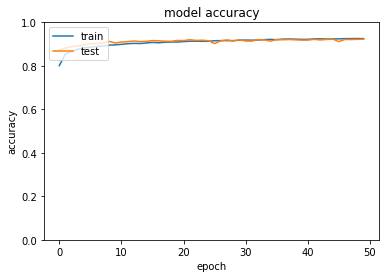

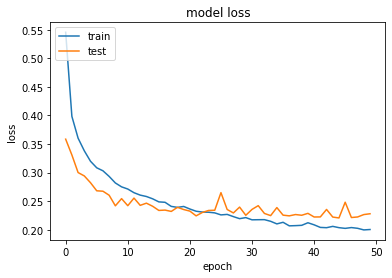

In [16]:
# GRAFICOS DE EVOLUCIÓN PARA la CNN
from matplotlib import pyplot as plt
plt.plot(historico_cnn.history['sparse_categorical_accuracy'])
plt.plot(historico_cnn.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

plt.plot(historico_cnn.history['loss'])
plt.plot(historico_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
#MEJOR ÉPOCA, LOSS Y ACCURACY DE TRAIN Y VALIDACIÓN CUANDO SE UTILIZA CHECKPOINT PARA LA CNN
epochs_stop=np.where(historico_cnn.history['val_loss'] == np.min(historico_cnn.history['val_loss']))
final_epoch=epochs_stop[0][0]
print(final_epoch)
print(historico_cnn.history['loss'][final_epoch-1])
print(historico_cnn.history['val_loss'][final_epoch-1])
print(historico_cnn.history['sparse_categorical_accuracy'][final_epoch-1])
print(historico_cnn.history['val_sparse_categorical_accuracy'][final_epoch-1])

44
0.2058076709508896
0.222098708152771
0.9231874942779541
0.9210833311080933


In [18]:
#DEFINICIÓN, COMPILACIÓN, ENTRENAMIENTO DEL MEJOR MODELO PM CON LOS MEJORES HIPERPARÁMETROS
# Se supone que es el siguiente modelo
lr = 0.0001
epochs = 10

model_cnn= Sequential()
model_cnn.add(BatchNormalization(input_shape=(28,28,1)))

model_cnn.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.5))

model_cnn.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model_cnn.add(Dropout(0.5))



model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu')) # En la imagen pone 356, está mal.
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_clases, activation='softmax'))

model_cnn.summary()

model_cnn.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

historico_cnn = model_cnn.fit(train_images, train_labels, epochs=epochs)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 128)         409728    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 128)       

In [19]:
#EVALUACIÓN DEL MODELO CNN
from sklearn.metrics import confusion_matrix, classification_report
evaluacion_cnn=model_cnn.evaluate(test_images, test_labels)

#PREDICCIONES EN BRUTO
raw_testPred = model_cnn.predict(test_images)
fichero_prediccion_cnn = []
for x in raw_testPred:
        fichero_prediccion_cnn.append(x)
pd.DataFrame(fichero_prediccion_cnn).to_csv(path+'fichero_prediccion_cnn.txt', index=False, header=None) 
#prediccion en bruto de los 10 primeros patrones de test: 
#10 vectores de valores reales 
print(raw_testPred[:10])

#PREDICCIONES DE LA CLASE
class_testPred = np.argmax(raw_testPred, axis=1)
fichero_prediccion_cnn_clases = []
for x in class_testPred:
        fichero_prediccion_cnn_clases.append(x)
pd.DataFrame(fichero_prediccion_cnn_clases).to_csv(path+'fichero_prediccion_cnn_clases.csv', index=False, header=None)
#predicción de la clase de los 10 primeros patrones de test
print(class_testPred[:10])

cm_cnn=confusion_matrix(test_labels, class_testPred)
print(cm_cnn)

print('Classification Report')
target_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal',  'Shirt',   'Sneaker',  'Bag',   'Ankle Boot']
print(classification_report(test_labels, class_testPred, target_names=target_names))

313/313 [==============================] - 1s 2ms/step
[[1.54339114e-06 4.51356954e-07 5.99903103e-07 2.29067297e-07
  2.13845524e-07 2.46937998e-04 6.99431439e-07 5.76676754e-03
  1.02922531e-05 9.93972242e-01]
 [3.56932520e-04 1.11852671e-07 9.96963561e-01 8.51994082e-06
  1.49012171e-03 1.19258328e-08 1.17936684e-03 1.27943234e-09
  1.27107069e-06 6.99382312e-08]
 [3.36935301e-07 9.99998808e-01 1.78110628e-08 3.96142241e-07
  3.33581710e-07 2.60247324e-10 9.35387519e-08 7.13739762e-11
  5.36402531e-08 1.38925902e-11]
 [1.33645230e-07 9.99998331e-01 3.69479451e-08 1.20195045e-06
  2.84575464e-07 1.26060912e-10 1.20197868e-07 6.10239775e-11
  1.80636093e-08 1.06385551e-11]
 [5.92333861e-02 6.34729513e-05 1.97909754e-02 6.99157128e-03
  2.42492054e-02 9.70854671e-06 8.89560401e-01 1.77466461e-06
  8.93372417e-05 1.01745763e-05]
 [1.31115985e-05 9.99972939e-01 2.17286220e-06 3.55031307e-06
  5.97718599e-06 6.82268153e-09 1.72085345e-06 1.22864574e-09
  4.30911427e-07 4.07129636e-10]
 [1

In [20]:
historico_pm = model_pm.fit(train_images, train_labels, epochs=50, validation_freq=1, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/50
1496/1500 [============================>.] - ETA: 0s - loss: 0.7326 - sparse_categorical_accuracy: 0.7454
Epoch 1: val_loss did not improve from 0.22055
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7322 - sparse_categorical_accuracy: 0.7455 - val_loss: 0.4360 - val_sparse_categorical_accuracy: 0.8438
Epoch 2/50
1499/1500 [============================>.] - ETA: 0s - loss: 0.5240 - sparse_categorical_accuracy: 0.8145
Epoch 2: val_loss did not improve from 0.22055
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5239 - sparse_categorical_accuracy: 0.8145 - val_loss: 0.4062 - val_sparse_categorical_accuracy: 0.8585
Epoch 3/50
1492/1500 [============================>.] - ETA: 0s - loss: 0.4870 - sparse_categorical_accuracy: 0.8284
Epoch 3: val_loss did not improve from 0.22055
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4873 - sparse_categorical_accuracy: 0.8283 - val_loss: 0.3900 - val_sparse_categorical_accuracy: 0.

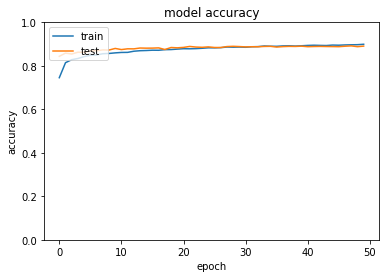

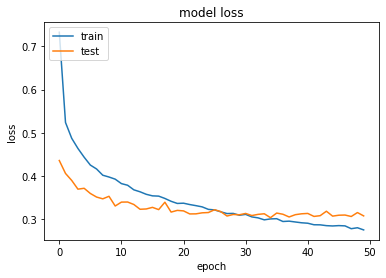

In [21]:
# GRAFICOS DE EVOLUCIÓN PARA EL PM
plt.plot(historico_pm.history['sparse_categorical_accuracy'])
plt.plot(historico_pm.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

plt.plot(historico_pm.history['loss'])
plt.plot(historico_pm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
#MEJOR ÉPOCA, LOSS Y ACCURACY DE TRAIN Y VALIDACIÓN CUANDO SE UTILIZA CHECKPOINT PARA EL PM
epochs_stop=np.where(historico_pm.history['val_loss'] == np.min(historico_pm.history['val_loss']))
final_epoch=epochs_stop[0][0]
print(final_epoch)
print(historico_pm.history['loss'][final_epoch-1])
print(historico_pm.history['val_loss'][final_epoch-1])
print(historico_pm.history['sparse_categorical_accuracy'][final_epoch-1])
print(historico_pm.history['val_sparse_categorical_accuracy'][final_epoch-1])

34
0.2990785837173462
0.3131033480167389
0.8913750052452087
0.8892499804496765


# Definición modelo final

In [23]:
#DEFINICIÓN, COMPILACIÓN, ENTRENAMIENTO DEL MEJOR MODELO PM CON LOS MEJORES HIPERPARÁMETROS
# se supone:
num_neuronas1=150
num_neuronas2=150
lr = 0.0001
epochs = 50

model_pm = Sequential()
model_pm.add(BatchNormalization(input_shape=(28,28)))
model_pm.add(Flatten(input_shape=(28,28)))
model_pm.add(Dense(num_neuronas1, activation='relu'))
model_pm.add(Dense(num_neuronas2, activation='relu'))
model_pm.add(Dense(num_clases, activation='softmax'))

model_pm.compile(
  #optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),
  #optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
  #optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy'])

historico_pm = model_pm.fit(train_images, train_labels, epochs=epochs)

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5454 - sparse_categorical_accuracy: 0.8085
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3779 - sparse_categorical_accuracy: 0.8633
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3385 - sparse_categorical_accuracy: 0.8781
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3136 - sparse_categorical_accuracy: 0.8856
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2929 - sparse_categorical_accuracy: 0.8915
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2743 - sparse_categorical_accuracy: 0.9008
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2617 - sparse_categorical_accuracy: 0.9037
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2485 - sparse_categorical_accuracy: 0.9092
Epoch 9/50
1875/1875 [==========

In [24]:
#EVALUACIÓN DEL MODELO PM
from sklearn.metrics import confusion_matrix, classification_report
evaluacion_pm=model_pm.evaluate(test_images, test_labels)

#PREDICCIONES EN BRUTO
raw_testPred = model_pm.predict(test_images)

fichero_prediccion_pm = []
for x in raw_testPred:
        fichero_prediccion_pm.append(x)
pd.DataFrame(fichero_prediccion_pm).to_csv(path+'fichero_prediccion_pm.txt', index=False, header=None) 
#prediccion en bruto de los 10 primeros patrones de test: 
#10 vectores de valores reales 
print(raw_testPred[:10])

#PREDICCIONES DE LA CLASE
class_testPred = np.argmax(raw_testPred, axis=1)
fichero_prediccion_pm_clases = []
for x in class_testPred:
        fichero_prediccion_pm_clases.append(x)
pd.DataFrame(fichero_prediccion_pm_clases).to_csv(path+'fichero_prediccion_pm_clases.csv', index=False, header=None)
#predicción de la clase de los 10 primeros patrones de test
print(class_testPred[:10])

cm_pm=confusion_matrix(test_labels, class_testPred)
print(cm_pm)

print('Classification Report')
target_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal',  'Shirt',   'Sneaker',  'Bag',   'Ankle Boot']
print(classification_report(test_labels, class_testPred, target_names=target_names))

313/313 [==============================] - 1s 2ms/step
[[1.13495840e-15 2.13691613e-13 1.48162923e-11 3.49502328e-12
  2.00802143e-13 1.00367053e-07 5.68469438e-11 2.29281841e-06
  1.54715338e-10 9.99997616e-01]
 [3.31743329e-04 2.17344555e-14 9.99667645e-01 8.78251458e-16
  5.56744283e-07 5.58896940e-21 2.84466584e-08 7.59117876e-18
  6.40722447e-13 2.65268244e-20]
 [7.61805392e-16 1.00000000e+00 1.67448902e-20 1.01262127e-16
  2.74628347e-18 6.28939347e-20 1.79513323e-15 7.27023258e-21
  4.53482699e-16 4.11397202e-18]
 [7.93941356e-13 1.00000000e+00 1.99180380e-16 3.44962045e-11
  1.00645609e-15 9.04549364e-15 6.43428713e-11 5.46753646e-18
  1.81779166e-14 1.74923383e-14]
 [8.15422952e-01 3.56843843e-09 5.74341866e-05 7.88636738e-04
  6.88440268e-05 9.73257308e-11 1.83662131e-01 1.12076954e-11
  5.77632331e-10 2.27671337e-11]
 [5.48388205e-14 1.00000000e+00 6.52305525e-16 2.30912549e-14
  1.91645340e-19 2.06019299e-18 3.13551133e-14 2.01019542e-20
  2.00996104e-17 1.12610185e-17]
 [4

In [25]:
#GUARDAR RESULTADOS Y MODELOS
np.savetxt('evaluacion_cnn.txt',evaluacion_cnn,newline='\t')
np.savetxt('historicoTrainLoss_cnn.txt',historico_cnn.history['loss'])
np.savetxt('historicoTrainAcc_cnn.txt',historico_cnn.history['sparse_categorical_accuracy'])

np.savetxt('evaluacion_pm.txt',evaluacion_pm,newline='\t')
np.savetxt('historicoTrainLoss_pm.txt',historico_pm.history['loss'])
np.savetxt('historicoTrainAcc_pm.txt',historico_pm.history['sparse_categorical_accuracy'])

# matriz de confusión
np.savetxt('matrizConf_cnn.txt', cm_cnn, fmt='%-3d')
#para guardar el modelo completo
model_cnn.save('modelo_cnn.h5')
#para guardar solo los pesos
model_cnn.save_weights('pesos_cnn.h5')




# matriz de confusión
np.savetxt('matrizConf_pm.txt', cm_pm, fmt='%-3d')
#para guardar el modelo completo
model_pm.save('modelo_pm.h5')
#para guardar solo los pesos
model_pm.save_weights('pesos_pm.h5')

